<br> Alex Attisha 
<br> Jonah Lindau
<br> Pietro Lugato
<br>Ethan Treihaft 
# <center> Hodgkin-Huxley Model <br>
## Introduction (Ethan)<br>
The goal of this experiment is to create an iPython simulation that shows how the Hodgkin-Huxley model works. The experiment will begin by importing the useful repositories, defining a specific time array, and setting known constants of the channel pumps and potentials of both potassium and sodium ions. Next, it is important to define the potassium and sodium ion-channel functions. After integrating the functions and setting up three different time ranges, it is possible to calculate the rate of action potentials and neurons much more precisely than if conducted by hand.
<br>
## Background (Ethan) <br>
The Hodgkin-Huxley model was originated from two mathematicians, A.L Hodgkin and A.F. Huxley, that explained how nerve cells behave in squids. While looking at the giant axons within the squids, they were able to create a new type of circuit model based upon how squids carried action potentials. Through a resistor in parallel with a capacitor, it was proven that current can be charged and discharged by a capacitor. Some important equations that are used in this experiment are: <br>
$$\alpha_n = \frac{0.01(V+10)}{e^{\frac{V+10}{10}}-1}$$

$$\beta_n = 0.125e^{\frac{V}{80}}$$
<br>
$\alpha_n$ and $\beta_n$ are rate constants which vary with voltage. 
<br>
$$\frac{dm}{dt} = \alpha_m(1-m)-\beta_mm$$

$$\frac{dh}{dt} = \alpha_h(1-h)-\beta_hh$$
<br>
These equations help differentiate $\alpha_n$ and $\beta_n$ so we can find functions to describe the action potentials.
## Abstract and Motivation (Ethan) <br>
Our python model will seek to utilise the Hodgkin-Huxley model to approximate Action Potentials and neurons. Using the information we learned from AC and DC circuits, we will endeavor to answer the following questions:

1.  What is the maximum amount of current the system can support and how responses different at differing levels of current
2.  How accurate is this model, and what specifically can be improved? Can we use our knowledge base to improve that thing?
3.  The lipid bilayer, or CNS/PNS myelin sheath is approximated as a capacitor in Hodgkin-Huxley. How might different myelin sheaths, with different dielectric constants affect the system?<br>

These questions carry broad implications regarding the human body and neurons and are of interest in our ability to determine both how neurons work, and to provide greater microscopic insight regarding one of the most mysterious and interesting organs in the human body: the brain. Although the Hodgkin-Huxley model was originally only meant for squids, a simpler organism relative to humans, the model itself carries implications regarding nervous systems across the animal kingdom, and by adding additional components contains the potential to be applied to more complex nervous systems. Additionally, a few students in this group are potentially pre-med, and thus find this model interesting  because it approximates nervous system function.
<br>
## Model (Pietro) <br>
![Circuit Drawing](https://imgur.com/SObVcsb.jpg)

As you can see the Hodgkin-Huxley model simplifies the neuron into a circuit. This was something done by Hodgkin and Huxley, and is something that we used when building out our python model. As you can see from the picture above each parallel line of the circuit corresponds to different parts of the cell which include: the Na, the K, and the leak Gates. The gates themselves are split into 2 components: a conductance and a battery. Conductance is in reference to the ease at which these elements can flow into and out of the cell. The batteries represent the potential difference of the neuron which actually causes the conductance and the action potential itself. The lipid bilayer is represented as a capacitor. This was done because the bilayer seperates two conducting surfaces and has some fixed amount of capacitance which has been experiementally proven and will be touched on later.

##**Code Setup**



---


###**Code 1: Repositories** <br> Import Normal Repositories (numpy, matplotlib) and one New repository (scipy- odeint) (Pietro)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint #explained later



---


###**Code 2: Time Range and Array (Pietro)**  <br> We defined a reasonable time range from the 0 to 50 milliseconds. These values were changed multiple times as the original time period of 10 milliseconds was too small and the next time period we tried, 100 milliseconds, was too long. We found 50 milliseconds was the sweet spot. Additionally using the np.linspace we created an array that we will use throughout the rest of the model. We created the array from $t_0$, or 0, to $t_{\text{max}}$, or 50, milliseconds with 10,000 points between them. 10,000 points was chosen in order to ensure the model was accurate but not excessive. 

In [0]:
#time range, both values in ms
t_naught = 0.0 
t_final = 50.0


#time array we will use throughout code
steps = 10000
TIME = np.linspace(t_naught, t_final, steps)





---


### **Code 3: Circuit Component Constants (Ethan)** <br> 
These are experimental constants we found online regarding the channels in the neuron. We sourced these from a couple different places:  

1.   [The Original Hodgkins-Huxley Paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf)
2.   [Neuronal Dynamics](https://neuronaldynamics.epfl.ch/online/Ch2.S2.html) <br>
We decided on the values we did because they were the original values from the 
Hodgkins-Huxley paper. However we did play around with a couple different values and we will address the effects in the conclusion section. 


In [0]:
g_K = 36.0 #Average potassium channel conductance per unit area in mS/cm^2

g_Na = 120.0 #Average Na channel conductance per unit area in mS/cm^2

g_l = 0.3 #Average leak channel conductance per unit area in mS/cm^2

C_membrane = 1.0 #Membrane capacitance per unit area in uF/cm^2

V_K = -12.0 #Potassium potential in mV

V_Na = 115.0 #Sodium potential in mV

V_l = 10.613 #Leak Gate potential in mV

### **Code 4: Potassium Ion-Channel Functions (Ethan):** <br>
The following equations calculate our values for $\alpha_n$ and $\beta_n$ respectively: 
<br>
<br>
$$\alpha_n = \frac{0.01(V+10)}{e^{\frac{V+10}{10}}-1}$$

$$\beta_n = 0.125e^{\frac{V}{80}}$$
<br>
As stated in Hodgkin-Huxley, $\alpha_n$ and $\beta_n$ are rate constants which vary with voltage but not with time. Also, they both have unit msec$^{-1}$. $n$ is also a dimensionless variable representing the proportion of the particles in a given position (inside or outside a membrane) and varies between 0 and 1. $\alpha_n$ is the rate of transfer of charge from outside to inside and $\beta_n$ is the opposite. $V$ is the membrane potential in units $mV$. These equations were derived by Hodkin and Huxley from existing identities describing potassium conductance:
<br>
<br>
$$g_\kappa = \bar g_\kappa n^4$$

$$\frac{dn}{dt} = \alpha_n(1-n)-\beta_nn$$
<br>
For our calculations, we modified the equation for $\alpha_n$ and $\beta_n$ to be
<br>
<br>
$$\alpha_n=\frac{0.01(10-V)}{e^{1-\frac{v}{10}}-1}$$
$$\beta_n = 0.125e^{\frac{-V}{80}}$$
<br>
We did this so we can use positive $V$ values in order to avoid mistakes by accidentally forgetting to put a negative sign before the V when adding new values. 

In [0]:

#rate functions for Potassium ion-channel 
def a_n(V_membrane):
  a = (0.01*(10.0-V_membrane))/(np.exp(1.0-(0.1*V_membrane))-1.0)
  return a

def b_n(V_membrane):
  b = 0.125*np.exp(-V_membrane/80.0)
  return b


### **Code 5: Sodium Ion-Channel Functions (Ethan):** <br>
The following equations calculate our values for $\alpha_m$, $\beta_m$, $\alpha_h$, and $\beta_h$ respectively: 
<br>
<br>
$$\alpha_m = \frac{0.01(V+25)}{e^{\frac{V+25}{10}}-1}$$

$$\beta_m = 4e^{\frac{V}{18}}$$

$$\alpha_h = 0.07e^{\frac{V}{20}}$$

$$\beta_h = \frac{1}{e^{\frac{V+30}{10}}+1}$$
<br>
All variables listed have units msec$^{-1}$, consistent with $\alpha_n$ and $\beta_n$. V represents the same idea as noted before. 
<br>
<br>
From the formal assumptions made by Hodgkin and Huxley, we get that 
<br>
<br>
$$g_{Na} = m^3h \bar g_{Na}$$

$$\frac{dm}{dt} = \alpha_m(1-m)-\beta_mm$$

$$\frac{dh}{dt} = \alpha_h(1-h)-\beta_hh$$
<br>
As we can see here, $g_{Na}$ depends on more than one variable. For this section, we will look at $m$ and $h$ separately. This is because they represent very different things; $m$ is much like $n$ from Code 4, but when dealing with sodium conductance, we also have to consider inactivation process, $h$. This is because, when dealing with sodium, we have to account for the movemnet of a negatively charged particle blocking the flow of sodium ions inside the membrane. 

We have adjusted each of the equations above the same way we adjusted the equations of $\alpha_n$ and $\beta_n$ for simplicity and to remain consistent across variables.


In [0]:
#rate functions for Sodium ion-channel
def a_m(V_membrane):
  a1 = (0.1*(25.0-V_membrane))/(np.exp(2.5-(0.1*V_membrane))-1.0) 
  return a1

def b_m(V_membrane):
  b1 = 4.0*np.exp(-V_membrane/18.0) 
  return b1

def a_h(V_membrane):
  a2 = 0.07*np.exp(-V_membrane/20.0)
  return a2

def b_h(V_membrane):
  b2 = 1.0/(np.exp(3.0-(0.1*V_membrane))+1.0)
  return b2
  

### **Code 6: Steady-State Values (Jonah):** <br>
The following equations are used to find steady state values for $n$ $m$ and $h$ respectively:
$$n_\infty = \frac{\alpha_n}{\alpha_n+ \beta_n}$$
<br>
$$m_\infty = \frac{\alpha_m}{\alpha_m+ \beta_m}$$
<br>
$$h_\infty = \frac{\alpha_h}{\alpha_h+ \beta_h}$$

Each $n$,$m$,and $h$ respectively are proportions of the particles in a certain position. Therefore this makes sense as we are taking the ratio of particles coming into the membrane with the total change in 

In [0]:
#steady state values defined
def n_inf(V_membrane = 0.0):
    return a_n(V_membrane)/(a_n(V_membrane)+b_n(V_membrane))

def m_inf(V_membrane = 0.0):
    return a_m(V_membrane)/(a_m(V_membrane)+b_m(V_membrane))

def h_inf(V_membrane = 0.0):
    return a_h(V_membrane)/(a_h(V_membrane)+b_h(V_membrane))


### **Code 7: Current Function: (Alex)** <br>
Below we defined a logic "tree" for current with respect to time. From 0 to 1 ms, the current would be strongest as this has the smallest time difference between the stimulus and response, ergo stronger current evokes a stronger response. The current decays as a step function in the circuit with respect to time and we arbitrarily chose 3 different values at each time range. Something we will also touch on in the conclusions section was how changing the current, and even experimenting with a current function (similar to the ones we learned about on flipit) might change how this neuron behaves. 

In [0]:
#input stimulus (current)
def I_d(t):
    if 0.0<t<1.0:
        return 150.0
    elif 10.0<t<11.0:
        return 50.0
    return 0.0
  

### **Code 8: Potassium Ion-Channel Functions (Pietro):** <br>
Here we will be using the ODEINT function to solve the previously mentioned set of four differential equations, as it is quite useful here. The function takes three inputs. First, a method that will return the derivative values at a given y and t value (dy/dt). In this code, we call this method “calc_deriv”. “calc_deriv” takes in a time value, and the four variables: “V_membrane”, “n”, “m”, and “h”. The equations used are those derived by Hodgkin and Huxley as cited earlier. As required when solving all ordinary differential equations, initial conditions are required. The second input is just that, the initial conditions of the differential states. Keep in mind, this can be an array if there is a system of differential equations, and in this code, we call this array “Y”, defined in the second code box. Notice, our initial membrane potential (V_membrane) is 0, and our steady state values for n, m, and h serve as the initial values for their respective differential equations. The third input of the ODEINT function is simply the time points at which the solutions should be recorded. This will be our “Time” array, defined and described well above in the code. We save the output of ODEINT into a variable called V_y, so it can be used below in graphing our results.

In [0]:
#calculate the derivatives 
def calc_deriv(y_array, t0): 
    derivs = np.zeros((4,))
    
    V_membrane = y_array[0]
    n = y_array[1]
    m = y_array[2]
    h = y_array[3]
    
    #d(V_membrane)/dt:
    G_K = (g_K/C_membrane)*np.power(n,4.0)
    G_Na = (g_Na/C_membrane)*np.power(m,3.0)*h
    G_L = g_l/C_membrane
    
    derivs[0] = (I_d(t0)/C_membrane)-(G_K*(V_membrane-V_K))-(G_Na*(V_membrane-V_Na))-(G_L*(V_membrane-V_l))
    
    #dn/dt:
    derivs[1] = (a_n(V_membrane)*(1.0-n))-(b_n(V_membrane)*n)
    
    #dm/dt:
    derivs[2] = (a_m(V_membrane)*(1.0-m))-(b_m(V_membrane)*m)
    
    #dh/dt:
    derivs[3] = (a_h(V_membrane)*(1.0-h))-(b_h(V_membrane)*h)
    
    return derivs
  

In [0]:

#initial vals
y_init = np.array([0.0, n_inf(), m_inf(), h_inf()])


In [0]:
#ODEINT - solving the differential equations, explanation above
V_y = odeint(calc_deriv, y_init, TIME)


### **Code 9: Current Function --> Current Array (Alex):** <br>
Here we iterated the current function over our entire timetable. $I dt$ is our current function, and by creating a new array that fills the value of the current function at each time range we now have an accurate simulation of what happens to the current as time progresses. We are effectively making our current function a current array. Looking at actual plots of voltage due to action potentials this is highly inaccurate. Here are textbook pictures of an action potential: <br>
![](https://i.imgur.com/ScNsrIR.jpg) 

In [0]:
#input stimulus
I_array = [I_d(t) for t in TIME]


## **Original Graphs (Ethan)**

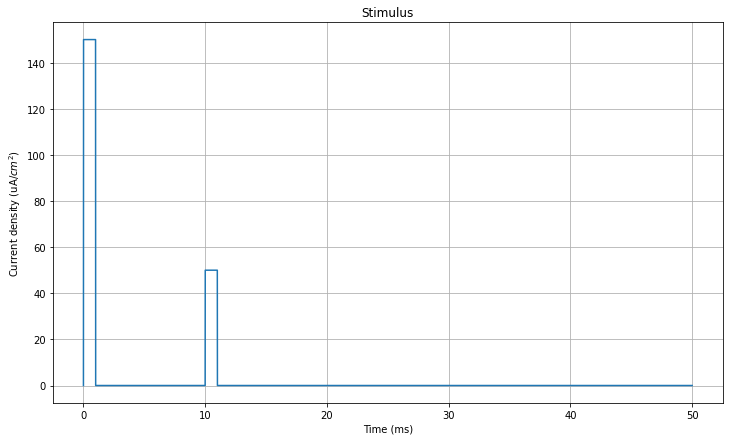

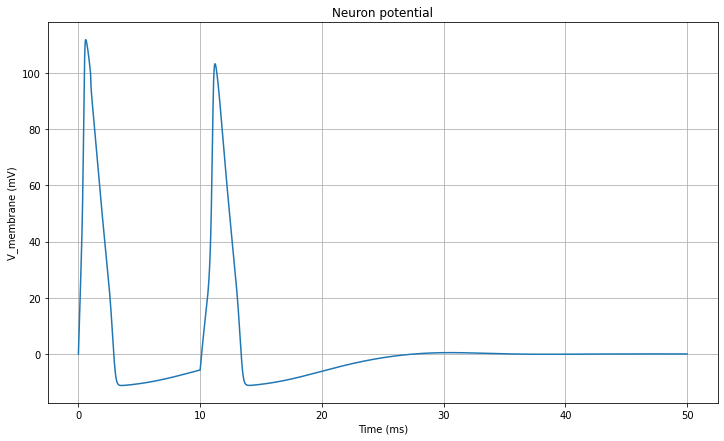

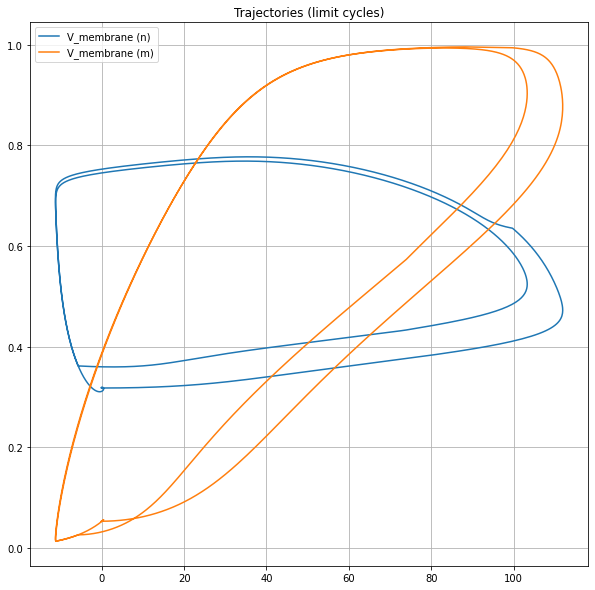

In [0]:
#graphing stimulus
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(TIME, I_array)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus')
plt.grid()

#graphing neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(TIME, V_y[:, 0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('V_membrane (mV)')
ax.set_title('Neuron potential')
plt.grid()

#graphing trajectories (with limit cycles)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(V_y[:, 0], V_y[:, 1], label='V_membrane (n)')
ax.plot(V_y[:, 0], V_y[:, 2], label='V_membrane (m)')
ax.set_title('Trajectories (limit cycles)')
ax.legend()
plt.grid()

## **Results and Conclusions (Ethan):** <br>
In our model, after calculating the experiment, we found that the first neuron potential spike was about 110mV and the resting potential is around 0mV. After finding research on the experiment, the actual model showed that the first spike was roughly 40mV and its resting potential is -70mV. So, the spikes have the same area under their curve, so their integral value is the same, but they each have a different numerical spike meaning the graph is shifted. The true graph is shown here: 

![alt text](https://www.zoology.ubc.ca/~gardner/F21-12A.GIF). 

For our limit cycle graph, the Vm-n graph is the same except ours is shifted about 100V to the right. The true model is shown here:  

![alt text](https://www.researchgate.net/profile/Jean-Marc_Ginoux/publication/286440254/figure/fig3/AS:324921403166720@1454478707194/Phase-portrait-canard-solution-and-slow-manifold-of-the-Hodgkin-Huxley-system-60a.png)

The questions we listed above are and these outcomes are thouroughly explained below.




###**Question 1: What is the maximum amount of current the system can support and how are responses different at differing levels of current? (Alex)** <br>



####**Model Explanation and Code:**
Going through this model I very quickly realized that in our model one critical shortcoming is that the current is really only used to demonstrate that there is a current on the graph. One thing I wanted to do was try and use Ohm's Law to see what the current would look like when dividing the voltage of the neuron by the total resistivity of the circuit. Below is a graph of what the current would look like. I also graphed the original current graph on the same plot for reference. One thing I would like to note is that in this approximation we approximated the voltage gates of having an internal resistance of 0.

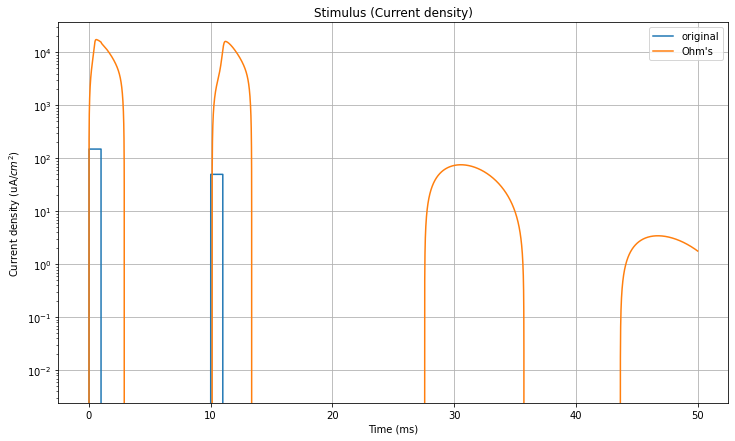

In [0]:
g_K = 36.0 #Average potassium channel conductance per unit area in mS/cm^2

g_Na = 120.0 #Average Na channel conductance per unit area in mS/cm^2

g_l = 0.3 #Average leak channel conductance per unit area in mS/cm^2

Gtot = (g_l + g_Na + g_K)
Rtot = Gtot**-1

def I_d(t):
    if 0.0<t<1.0:
        return 150.0
    elif 10.0<t<11.0:
        return 50.0
    return 0.0

Iarray = [I_d(t) for t in TIME]

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(TIME, I_array, label = 'original')
ax.semilogy(TIME, (V_y[:, 0])/Rtot, label = "Ohm's")
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
plt.grid()
plt.legend()

Above is the result from using an Ohm's law approximation to try and estimate the current, plotted using a semilog scale in order to ensure that the individual components of the graph can be seen. These are wildly different results, with the Ohm's law approximation peaking at roughly .01 $\frac{A}{cm^2}$ which is roughly $10^2$ greater than the original current function. Another thing here is that there is action happening after the 50 ms mark which is different compared to the original findings. Below are the key shortcomings regarding our original current function:
1.   The function does not decay like a normal RC circuit would once the switch (i.e. Action Potential) is "opened"
2.   The Ohm's Law current function is VERY different from the current function approximation
3.  There could be nonzero current densities at times greater than t = 11 ms that are not being included

Naturally I decided to forget the original arbitrary model, and instead see how this function would respond if it were an ideal RC circuit. Below is that result:

<br>*there is no $Q_0$ value regarding Hodgkin-Huxley, and we are missing information to approximate it thus I used the value of 5 C arbitrarily



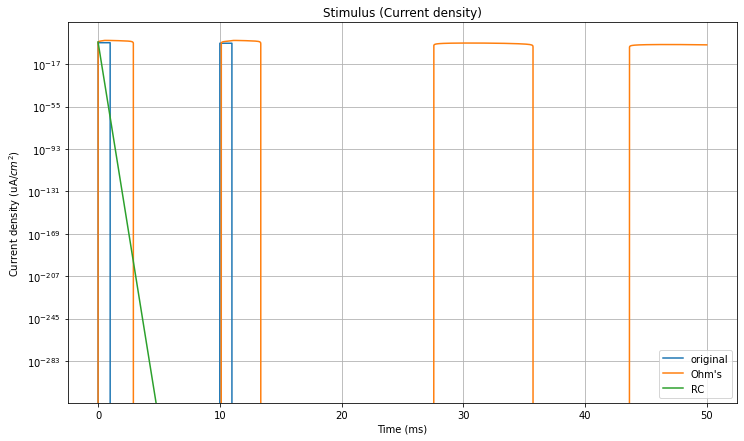

In [0]:
#RC Circuit Equations curtesy of FlipitPhysics Gentleman

tau = Rtot*C_membrane
q_0 = C_membrane*5
i_RC = (q_0/tau)*np.exp(-(TIME/tau))


fig, ax = plt.subplots(figsize=(12, 7))
ax.semilogy(TIME, I_array, label = 'original')
ax.plot(TIME, (V_y[:, 0])/Rtot, label = "Ohm's")
ax.semilogy(TIME,i_RC, label = 'RC' )


ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
plt.grid()
plt.legend()

The limitations of the RC model are clear and evident:


1.   MUCH less current density magnitude than needed
2.   Much faster decay rate than both Ohm's current model and the Original current model

Therefore the RC model is not a viable approximation of current density in Neurons during action potentials. 


####**Critical Conclusions from Question 1:**
A limitation of the Hodgkin-Huxley model itself is that the Current Density is not that important, rather the model focuses on the voltage of the action potential itself. In my efforts to discover a more accurate array function I found the actual current of an action potential: <br>
![](https://i.imgur.com/ScNsrIR.jpg) 
<br>
None of these functions are at all similar to the functions depicted in the picture, other than the function derived from the Ohm's Law approximation of the current density. This allows for me to draw the following conclusions from this system. 

1.   The system is unilateral:
In essence this means that an electrical system may have certain elements that do not have the same voltage current relation for both directions of the system. This means there is some element of the circuit which has been excluded from the Hodgkins-Huxley model itself which affects the current reading. This also means that Ohm's Law cannot be applied to this system to determine current density.

2.   The Hodgkin-Huxley model itself does not include a critical component of the cell in the circuit approximation

3.  The system is NOT an ideal RC circuit

In essence this means that using the Hodgkin-Huxley model itself it is impossible to calculate reasonable current numbers. This is because the circuit itself is incomplete. We as a group also feel like we do not know enough about both biology and electrical circuits to make an informed estimate regarding what this missing component might be. 



###**Question 2:  How accurate is this model, and what specifically can be improved? Can we use our knowledge base to improve that thing? (Pietro)**

Going through this model we very quickly realized that in our model one critical shortcoming is that the current is really only used to demonstrate that there is a current on the graph. One thing we wanted to do was try and use Ohm's Law to see what the current would look like when dividing the voltage of the neuron by the total resistivity of the circuit. Below is a graph of what the current would look like. We also graphed the original current graph on the same plot for reference. One thing we would like to note is that in this approximation we approximated the voltage gates of having an internal resistance of 0.
<br>

The Hodgkin-Huxley model was a huge advancement in the field of biophysics, and is widely considered to be one of the greatest achievements in the field during the 20th century. Their work won them the Nobel Prize in Physiology or Medicine in 1963. Still, science has advanced significantly since then, and that means various improvements and specifications have been made concerning the original Hodgkin-Huxley model. Here we will discuss a few of these improvements, and also their implications on this project’s code, for it does not account for every aspect of the model and is a rather simple representation of the modern Hodgkin-Huxley model. One thing that has been incorporated into the model is the transition-state theory. In short, this has to do with accounting for the reaction rates of the chemical reactions that occur in this model, and their inclusion allows for the production of thermodynamic Hodgkin-Huxley models. Another thing that has been included in new versions of the model are the complex geometries at play with actual neurons—specifically, dendrites and axons. Dendrites bring information to the cell body, and axons take information away from the cell body. Below is a simple image that illustrates this. <br>
![](https://i.imgur.com/oEdPUzN.png) <br>
Various other updates have been made to the original Hodgkin Huxley model, and it is worth mentioning a simplified neuronal model that had been created a few years later from the original, the Fitzhugh—Nagumo model, which does well to simulate groups of neurons, and provides interesting insight into the mathematical side of things when modeling action potential generation. Now, how could these and other modern improvements be implemented in this project’s code? One thing not accounted for in this program is the randomness that comes with neuronal networks. One significant example of this is known as noisy input, which means random, intrinsic electrical fluctuations within these networks. In other words, they are fluctuations that are in no way resultant from any type of stimuli. Although this typically isn’t at the voltage-threshold required for an action-potential to happen, these stochastic events do indeed sometimes present themselves in the form of action-potentials. Below is an attempt to integrate these events into our model, however proved to be very difficult to get correctly without errors. One thing that could have made this part easier is if we have originally solved the ODEs using Euler's method. This means we could have included the stochastic process much more easily within the loop, as opposed to figuring out a way to have it work with the ODEINT function.





/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less


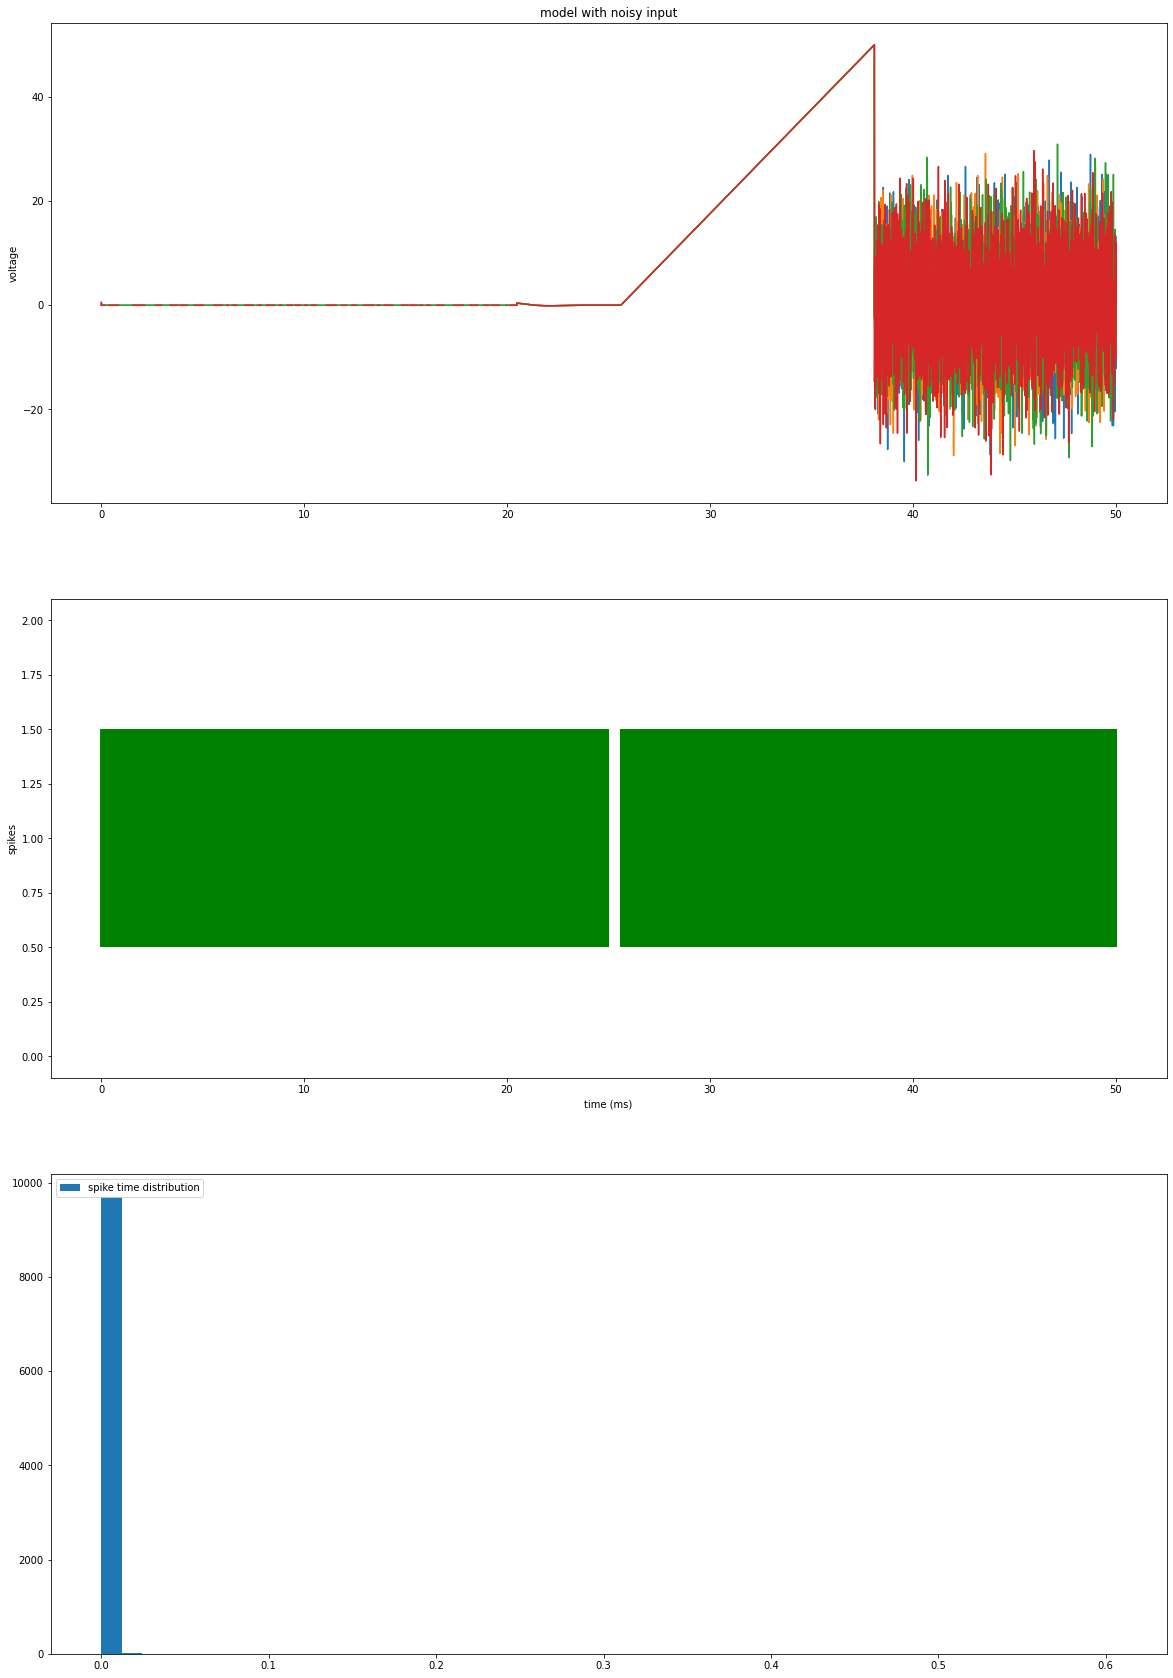

In [0]:
#calculate the derivatives 
def calc_deriv(y_array, t0): 
    derivs = np.zeros((4,))
    
    V_membrane = y_array[0] + np.random.normal(0,9)
    n = y_array[1]
    m = y_array[2]
    h = y_array[3]
    
    #d(V_membrane)/dt:
    G_K = (g_K/C_membrane)*np.power(n,4.0)
    G_Na = (g_Na/C_membrane)*np.power(m,3.0)*h
    G_L = g_l/C_membrane
    
    derivs[0] = (I_d(t0)/C_membrane)-(G_K*(V_membrane-V_K))-(G_Na*(V_membrane-V_Na))-(G_L*(V_membrane-V_l))
    
    #dn/dt:
    derivs[1] = (a_n(V_membrane)*(1.0-n))-(b_n(V_membrane)*n)
    
    #dm/dt:
    derivs[2] = (a_m(V_membrane)*(1.0-m))-(b_m(V_membrane)*m)
    
    #dh/dt:
    derivs[3] = (a_h(V_membrane)*(1.0-h))-(b_h(V_membrane)*h)
    
    return derivs
  

spikeEvents = []
Vnew = odeint(calc_deriv, y_init, TIME)
for i in range(1,len(Vnew)):
    if (((Vnew[i-1] < 0) ^ (Vnew[i] > 0)).any()):
        spikeEvents.append(round(TIME[i],3))

timeDist = []
for i in range(len(spikeEvents)):
    timeDist.append(spikeEvents[i]-spikeEvents[i-1])
max(timeDist)
timeDist = sorted(timeDist)
timeDist[0] = 0
len(spikeEvents)
x = range(len(spikeEvents))
np.mean(spikeEvents)
np.std(spikeEvents)
round((np.std(spikeEvents)/np.mean(spikeEvents)),4)
np.var(spikeEvents)

plt.figure(figsize=(20,30))
#plt.legend(loc='upper left')
plt.title('model with noisy input')
plt.subplot(3,1,1)
plt.plot(TIME,Vnew,label='voltage with noisy input');
plt.ylabel('voltage')
#plt.legend(loc='upper left')
plt.title('model with noisy input')
plt.subplot(3,1,2)
plt.eventplot(spikeEvents,label='spike events',colors='green');
#plt.legend(loc='upper left')
plt.xlabel('time (ms)')
plt.ylabel('spikes')
plt.subplot(3,1,3)
plt.hist(timeDist,50,label='spike time distribution')
plt.legend(loc='upper left');
plt.show()

The code above was inspired in part by [this code](https://github.com/nosratullah/HodgkinHuxely/blob/master/noisyInput.py), and it is worth showing the graphs produced when noisy input is integrated correctly.

<a href="https://imgur.com/ucocv37"><img src="https://i.imgur.com/ucocv37.png" title="source: imgur.com" /></a>

Above is a Hodgkin-Huxley spike model with a different time range and distribution compared to our code (top graph), that includes the noisy input (noisy input alone is middle graph). The bottom graph is the spike-time distribution.


---



### **Question 3:  The lipid bilayer, or CNS/PNS myelin sheath is approximated as a capacitor in Hodgkin-Huxley. How might different myelin sheaths, with different dielectric constants affect the system? (Jonah)**
<br>


One important note to start off with is that this value for capacitance per area is [a universal constant found throughout nature.](https://www.sas.upenn.edu/LabManuals/BBB251/NIA/NEUROLAB/MEMB/lipidbil.htm)
HH of course uses this value, and thus its important to acknowledge what changing this value means. According to [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3433620/): <br>


> In electrophysiological models such as the Hodgkin-Huxley model for nerve pulse propagation and in the interpretation of voltage-clamp experiments, it is assumed that the capacitance of biomembranes (in particular of nerves) is independent of voltage (i.e., Cm is constant) so that the second term on the right of this equation is zero (e.g., Johnston and Wu and Hodgkin and Huxley.): <br>
$$\frac{dQ}{dt} = \frac{d}{dt}(C_m * V_m)$$
$$ = C_m \frac{dV_m}{dt} + V_m \frac{dC_m}{dt} $$
This is equivalent to assuming that membrane dimensions are unaffected by electrical phenomena and that the excitation of membranes does not change their dimensions. The second of these assumptions is known to be incorrect because changes in the thickness of nerve membranes during the action potential have been observed

After learning this information we think its important to change our question as merely changing the dialectric constants will merely slightly change the original approximation made by HH. Instead we think it's better to ask: **Can we make a capacitor that is at least partially responsive to differential electrical phenomenon?**


As we tried to figure out what this meant in terms of differentials we pretty quickly realized something: We are in way over our heads due to the differing approximations that were made. So we decided to borrow a solution from the same research article:
$$\hat{C_m} \equiv C_m + V_m \frac{\partial C_m}{\partial V_m} $$

Since there was no defined membrance voltage we did some more digging about membrane approximations and found this image, along with an explanation for the [Goldman Equation](https://en.wikipedia.org/wiki/Goldman_equation) which reduces to the following circuit: <br>
<a href="https://imgur.com/7GuDqtG"><img src="https://i.imgur.com/7GuDqtG.png" title="source: imgur.com" /></a> <br>




####Goldman Circuit Code:
This is simply an RC circuit and using some of the code from Comp HW to model and solve this circuit

Energy delivered by the battery:
0.008754598430105015
Energy stored on capacitor:
0.004347819997610023
Energy dissipated by the resistor:
0.004408923995156285
Efficiency of the system (fraction of energy not lost):
0.4963876378389867


Text(0.5, 0, 'Time in units of RC')

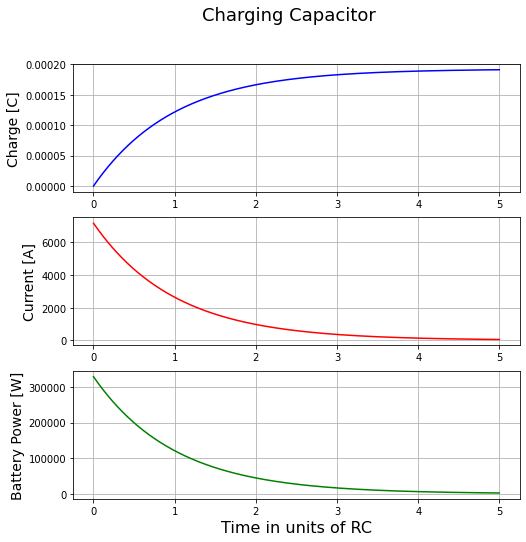

In [0]:
g_K = 36.0 #Average potassium channel conductance per unit area in mS/cm^2

g_Na = 120.0 #Average Na channel conductance per unit area in mS/cm^2

g_l = 0.3 #Average leak channel conductance per unit area in mS/cm^2

C_membrane = 1.0 #Membrane capacitance per unit area in uF/cm^2

V_K = -12.0 #Potassium potential in mV

V_Na = 115.0 #Sodium potential in mV

V_l = 10.613 #Leak Gate potential in mV

####################
# We Will Recycle some constants such as the Rtot, total Voltage 
#and initial charge on the capacitor
Gtot = (g_l+g_Na+g_K)
Rtot = Gtot**-1

# Membrane capacitance per unit area 
C_m_ = 1.*(4*np.pi/3)*.001**2  #uF/cm^2 [micro-Farads] .001 cm is the avg radius of a cell
Vb = (12.+115.+10.613)/3 #Voltage Average 
Q0 = 0 # C

#  This would be your RC, and define timesteps here
RC = Rtot*C_m_
dt = RC/1000
timesteps = np.arange(0, 5*RC, dt)

#  Set up arrays, e.g. qarray, iarray, prarray, pbarray
qarray = np.zeros(timesteps.shape)
iarray = np.zeros(timesteps.shape)
prarray = np.zeros(timesteps.shape)
pbarray = np.zeros(timesteps.shape)

#  First, initialize the variables that will be updated.  Then, write main loop here - 
#   Note, the governing equation will be:  V - IR - Q/C = 0

Q = Q0

for inum, timestep in enumerate(timesteps) :
    
    # Populate
    qarray[inum] = Q
    I = (Vb-Q/C_m_)/Rtot # I changes because the voltage across the capacitor changes as it picks up charge
    iarray[inum] = I  
    prarray[inum] = I**2*Rtot
    pbarray[inum] = I*Vb
    
    # Update
    Q = Q+I*dt


print('Energy delivered by the battery:')
e_battery = np.sum(pbarray*dt)
print(e_battery)
print('Energy stored on capacitor:')
e_capacitor = 0.5*qarray[-1]**2/C_m_  # The last item in the qarray is the charge at its maximal value (fully charged)
print(e_capacitor)
print('Energy dissipated by the resistor:')
e_resistor = np.sum(prarray*dt)
print(e_resistor)
print('Efficiency of the system (fraction of energy not lost):')
print((e_battery - e_resistor)/e_battery)


#  Plotting code here
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,8))
fig.suptitle('Charging Capacitor', fontsize=18)

axes = [ax1, ax2, ax3]
yarrays = [qarray, iarray, pbarray]
ylabels = ['Charge [C]', 'Current [A]', 'Battery Power [W]']
colors = ['b', 'r', 'g']

for ax, yarray, ylabel, color in zip(axes, yarrays, ylabels, colors) :
    ax.plot(timesteps/RC, yarray, color=color)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax3.set_xlabel('Time in units of RC', fontsize=16)

####Application of Goldman Circuit:

The Goldman circuit allowed us to see the membrane itself portrated as an RC circuit. This again shows an inaccuracy of the HH model because there is a subcircuit that was approximated as a single constant. Now using the Capacitance we calculated earlier and taking the V_y defined in the original code to be the V_membrane (an admittedly inaccurate approximation) and using our code for computing derivatives we plotted the Capacitance Change Below: 

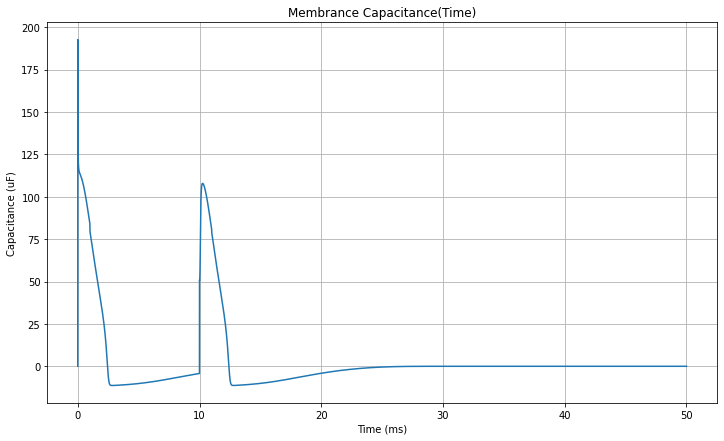

In [0]:
#calculate all the derivatives 
def calc_deriv(y_array, t0):
    derivs = np.zeros((4,))
    
    V_membrane = y_array[0]
    n = y_array[1]
    m = y_array[2]
    h = y_array[3]
    
    #d(V_membrane)/dt
    G_K = (g_K/C_m_)*np.power(n,4.0)
    G_Na = (g_Na / C_m_) * np.power(m,3.0)*h
    G_L = g_l / C_m_
    
    derivs[0] = (I_d(t0)/C_m_)-(G_K*(V_membrane-V_K))-(G_Na*(V_membrane-V_Na))-(G_L*(V_membrane-V_l))
    
    #dn/dt:
    derivs[1] = (a_n(V_membrane)*(1.0-n))-(b_n(V_membrane)*n)
    
    #dm/dt:
    derivs[2] = (a_m(V_membrane)*(1.0 - m))-(b_m(V_membrane)*m)
    
    #dh/dt:
    derivs[3] = (a_h(V_membrane)*(1.0-h))-(b_h(V_membrane)*h)
    
    return derivs
  

#initial vals
y_init = np.array([0.0, n_inf(), m_inf(), h_inf()])

#ODEINT - solving the differential equations, explanation above in Code 8
V_y = odeint(calc_deriv, y_init, TIME)

#Cm1 = Cm_ *np.ones(np.shape)(Time)
Cm2= C_m_ + V_y

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(TIME, Cm2[:, 0])


ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Capacitance (uF)')
ax.set_title('Membrance Capacitance(Time)')
plt.grid()


I'll be the first to acknowledge the many shortcomings of this approximation: it's not a partial derivative, the model is not directly varying with voltage. We believe due to the limitations imposed by our coding knowledge and biology knowledge this does allow us to see that theoretically the capacitance should vary. This is something that would be true even if Capacitance was a direct function of Voltage. Therefore the conceptual conclusions that are drawn should be the semi-accurate

#### **Final Takeaways:**

Based on research, the capacitance maintains a constant value. However in our model this is clearly not the case. This means that we can conclude that the capacitance does not vary only with time, but that there is some balancing agent ensuring that the capacitance does not change. We can also obviously conclude that a constant value is not a charging capacitor. However we realized that just because it isn't a charging capacitor doesn't mean that the membrane cannot be approximated as an RC circuit! Instead we realized that it could be a fully charged RC circuit which makes sense as membranes must maintain a potential difference, or charge, in order to ensure that the right things remain seperated. 

##**Works Cited:**


1. Hodgkin-Huxley Original Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf <br>

2. Neuronal Dynamics: Hodgkin-Huxley Model: https://neuronaldynamics.epfl.ch/online/Ch2.S2.html <br>

3. UPenn Lab Manuals: https://www.sas.upenn.edu/LabManuals/BBB251/NIA/NEUROLAB/MEMB/lipidbil.htm <br>

4. The Effect of Electrostriction: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3433620/

5. Goldman Equation: https://en.wikipedia.org/wiki/Goldman_equation